# Model Interpretation

In [7]:
#Boston Housing Dataset: Load the boston dataset.
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X = boston.data
y = boston.target

df_X = pd.DataFrame(X,columns=boston.feature_names)
#df_boston['target'] = y


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42)

In [8]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, rf.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, rf.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, rf.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, rf.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, rf.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, rf.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, rf.predict(X_test))))

MAE train:  2.430209668475808
MSE train:  10.816418653864988
RMSE train:  3.288832414986356
r2:  0.9364515252631678
MAE test:  2.6807648319448902
MSE test:  14.169518362345784
RMSE test:  3.7642420701046557
r2:  0.8999103005996582


In [5]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(alpha=0.1, batch_size=128, hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train,y_train)

from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, mlp.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, mlp.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, mlp.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, mlp.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, mlp.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, mlp.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, mlp.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, mlp.predict(X_test))))

MAE train:  3.323973770598967
MSE train:  21.807679457703824
RMSE train:  4.669869319124875
r2:  0.8671180639556938
MAE test:  3.448804021696338
MSE test:  20.33180273888002
RMSE test:  4.509080032432339
r2:  0.8527237886180535


## LIME: Local Interpretable Model-Agnostic Explanations 

![lime](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/figure4-99d9ea184dd35876e0dbae81f6fce038.jpg)

ref: Marco Tulio Ribeiro, Sameer Singh and Carlos Guestrin. Why Should {I} Trust You?: Explaining the Predictions of Any Classifier. SIGKDD16.

In [1]:
# Install the package in the current Jupyter kernel
import sys
!conda config --append channels conda-forge
!conda install --yes --prefix {sys.prefix} lime
#!{sys.executable} -m pip install lime

Solving environment: done

## Package Plan ##

  environment location: /home/mausoto/anaconda3

  added / updated specs:
    - lime


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37h06a4308_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py37h89c1867~ --> pkgs/main::conda-4.9.2-py37h06a4308_0



conda-4.9.2          | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import lime
import lime.lime_tabular

In [4]:
boston.feature_names
# CATEGORICAL: CHAS(3), RAD(8) 

NameError: name 'boston' is not defined

In [5]:
categorical_features=[3,8]

In [12]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=boston.feature_names, categorical_features=categorical_features, verbose=True, mode='regression')

In [13]:
i = 12
exp = explainer.explain_instance(X_train[i], rf.predict, num_features=5)

Intercept 24.130490473799625
Prediction_local [23.58456367]
Right: 22.010439262302917


In [15]:
exp.show_in_notebook(show_table=True)


In [36]:
exp_mlp = explainer.explain_instance(X_train[i], mlp.predict, num_features=5)

Intercept 22.39961962386025
Prediction_local [31.81126449]
Right: 30.89719814763526


In [37]:
exp_mlp.show_in_notebook(show_table=True)

## SHAP: SHapley Additive exPlanations

$$\phi_j(val)=\sum_{S\subseteq\{x_{1},\ldots,x_{p}\}\setminus\{x_j\}}\frac{|S|!\left(p-|S|-1\right)!}{p!}\left(val\left(S\cup\{x_j\}\right)-val(S)\right)$$

In [38]:
# Install the package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} shap
#!{sys.executable} -m pip install shap

In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(X_train,columns=boston.feature_names)


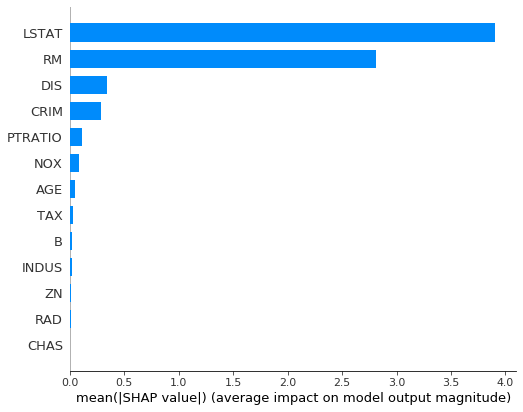

In [40]:
import shap  

explainer_rf = shap.TreeExplainer(rf,categorical_features=categorical_features)
shap_values = explainer_rf.shap_values(df_X_train)

shap.summary_plot(shap_values, df_X_train, plot_type="bar")



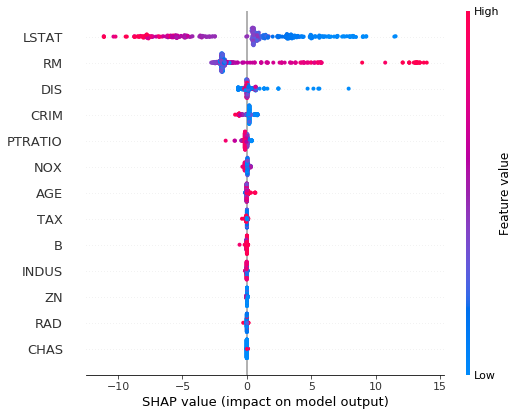

In [41]:
shap.summary_plot(shap_values, df_X_train)

In [47]:
shap.initjs()
shap.force_plot(explainer_rf.expected_value, shap_values, df_X_train)

In [49]:
i=10

expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], df_X_train.iloc[i,:])

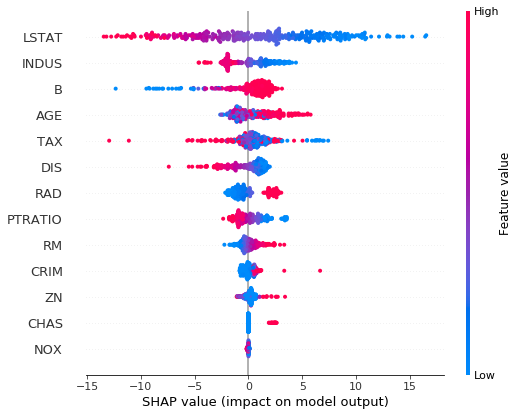

In [50]:
X_train_summary = shap.kmeans(X_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(mlp.predict, X_train_summary)
shap_values = explainer.shap_values(df_X_train)
shap.summary_plot(shap_values, df_X_train)

In [53]:
i=21

expected_value = shap_values[i,-1]

shap.force_plot(expected_value, shap_values[i,:], df_X_train.iloc[i,:])

In [52]:
shap.force_plot(explainer.expected_value, shap_values, df_X_train)